zsh:1: command not found: mamba


In [9]:
!pip install pyalex


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
# https://openalex.org/

from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
import pyalex
pyalex.config.email = "maximilian.noichl@uni-bamberg.de"

from itertools import chain
from tqdm.auto import tqdm

from compress_pickle import dump, load



/Users/Noich001/miniforge3/envs/network_epist_playground/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pyalex import Works
import pandas as pd


# https://openalex.org/works?page=1&filter=default.search%3A%22Personality%22%20AND%20%22Life%20Outcomes%22
# Create a query with the specified search terms
query = Works().search(['Perceptron']).filter(publication_year="<1979")
#.search(['"Personality" AND "Life outcomes"']).filter(publication_year=">2020")

records= []
for record in chain(*query.paginate(per_page=99,n_max=None)):
    records.append(record)
    print(len(records))



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [3]:
df = pd.DataFrame(records)
df

id  \
0    https://openalex.org/W2040870580   
1    https://openalex.org/W2086789740   
2    https://openalex.org/W2008353316   
3    https://openalex.org/W4233045210   
4    https://openalex.org/W2056003475   
..                                ...   
696  https://openalex.org/W4240120616   
697  https://openalex.org/W2071444489   
698  https://openalex.org/W2083386541   
699  https://openalex.org/W2794370213   
700  https://openalex.org/W4247794185   

                                           doi  \
0             https://doi.org/10.1037/h0042519   
1                                         None   
2              https://doi.org/10.2307/1419730   
3           https://doi.org/10.21236/ad0256582   
4    https://doi.org/10.1103/revmodphys.34.123   
..                                         ...   
696         https://doi.org/10.1007/bf02474354   
697   https://doi.org/10.1109/pgec.1963.263582   
698   https://doi.org/10.1109/pgec.1963.263401   
699         https://doi.org/10.6028/nbs.tn.193   
700         https://doi.org/10.6028/nbs.tn.462   

                                                 title  \
0    The perceptron: A probabilistic model for info...   
1    Perceptrons: An Introduction to Computational ...   
2    Principles of Neurodynamics: Perceptrons and t...   
3    PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND T...   
4     The Perceptron: A Model for Brain Functioning. I   
..                                                 ...   
696                         Bibliography and abstracts   
697           Abstracts of Current Computer Literature   
698           Abstracts of Current Computer Literature   
699  A bibliography of foreign developments in mach...   
700              Nonnumeric data processing in Europe:   

                                          display_name  relevance_score  \
0    The perceptron: A probabilistic model for info...      6109.080600   
1    Perceptrons: An Introduction to Computational ...      3898.089800   
2    Principles of Neurodynamics: Perceptrons and t...      2515.189500   
3    PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND T...      2183.452400   
4     The Perceptron: A Model for Brain Functioning. I      1295.428200   
..                                                 ...              ...   
696                         Bibliography and abstracts         0.307640   
697           Abstracts of Current Computer Literature         0.307522   
698           Abstracts of Current Computer Literature         0.290180   
699  A bibliography of foreign developments in mach...         0.254770   
700              Nonnumeric data processing in Europe:         0.193156   

     publication_year publication_date  \
0                1958       1958-01-01   
1                1969       1969-01-01   
2                1963       1963-12-01   
3                1961       1961-03-15   
4                1962       1962-01-01   
..                ...              ...   
696              1965       1965-01-01   
697              1963       1963-06-01   
698              1963       1963-02-01   
699              1963       1963-01-01   
700              1968       1968-01-01   

                                                   ids language  \
0    {'openalex': 'https://openalex.org/W2040870580...       en   
1    {'openalex': 'https://openalex.org/W2086789740...       en   
2    {'openalex': 'https://openalex.org/W2008353316...       en   
3    {'openalex': 'https://openalex.org/W4233045210...       en   
4    {'openalex': 'https://openalex.org/W2056003475...       en   
..                                                 ...      ...   
696  {'openalex': 'https://openalex.org/W4240120616...       en   
697  {'openalex': 'https://openalex.org/W2071444489...       en   
698  {'openalex': 'https://openalex.org/W2083386541...       en   
699  {'openalex': 'https://openalex.org/W2794370213...       en   
700  {'openalex': 'https://openalex.org/W4247794185...       en   

                                 

In [4]:
all_referenced_works = [x for y in df['referenced_works'] for x in y]


# all_unique_referenced_works = list(set(all_referenced_works))

# from collections import Counter

# def remove_less_frequent_items(lst, n):
#     counts = Counter(lst)
#     return [item for item in lst if counts[item] > n]

# # Set to 0 for full set:
# n = 0
# filtered_referenced_works = remove_less_frequent_items(all_referenced_works, n) # remove 
# print(len(filtered_referenced_works))

filtered_referenced_works = list(set(all_referenced_works)) #remove duplicates from download list.
additional_works_to_download = [x for x in filtered_referenced_works if x not in  df['id']]



all_aditional_records =[]
block_len = 99
# Loop in blocks of 50
for i in tqdm(range(0, len(additional_works_to_download), block_len)):
    sublist = additional_works_to_download[i:i+block_len]
    ID_str = "|".join([x.replace('https://openalex.org/','') for  x in sublist])
    record_list = Works().filter(openalex_id=ID_str).get(per_page=block_len)
    print(len(record_list))
    for this_record in record_list:
        all_aditional_records.append(this_record)



  3%|▎         | 1/37 [00:01<00:52,  1.47s/it]

99


  5%|▌         | 2/37 [00:03<00:54,  1.54s/it]

99


  8%|▊         | 3/37 [00:04<00:50,  1.49s/it]

99


 11%|█         | 4/37 [00:05<00:48,  1.48s/it]

98


 14%|█▎        | 5/37 [00:07<00:45,  1.42s/it]

97


 16%|█▌        | 6/37 [00:08<00:45,  1.46s/it]

99


 19%|█▉        | 7/37 [00:10<00:43,  1.44s/it]

99


 22%|██▏       | 8/37 [00:11<00:41,  1.42s/it]

99


 24%|██▍       | 9/37 [00:12<00:39,  1.41s/it]

99


 27%|██▋       | 10/37 [00:14<00:38,  1.41s/it]

99


 30%|██▉       | 11/37 [00:15<00:35,  1.35s/it]

99


 32%|███▏      | 12/37 [00:17<00:39,  1.57s/it]

99


 35%|███▌      | 13/37 [00:18<00:35,  1.49s/it]

97


 38%|███▊      | 14/37 [00:20<00:34,  1.49s/it]

99


 41%|████      | 15/37 [00:21<00:32,  1.50s/it]

98


 43%|████▎     | 16/37 [00:23<00:29,  1.42s/it]

99


 46%|████▌     | 17/37 [00:24<00:27,  1.35s/it]

99


 49%|████▊     | 18/37 [00:25<00:25,  1.33s/it]

99


 51%|█████▏    | 19/37 [00:27<00:23,  1.33s/it]

99


 54%|█████▍    | 20/37 [00:28<00:22,  1.33s/it]

99


 57%|█████▋    | 21/37 [00:29<00:22,  1.38s/it]

98


 59%|█████▉    | 22/37 [00:31<00:21,  1.44s/it]

99


 62%|██████▏   | 23/37 [00:32<00:18,  1.35s/it]

99


 65%|██████▍   | 24/37 [00:34<00:18,  1.40s/it]

99


 68%|██████▊   | 25/37 [00:35<00:18,  1.54s/it]

99


 70%|███████   | 26/37 [00:37<00:16,  1.47s/it]

99


 73%|███████▎  | 27/37 [00:38<00:14,  1.43s/it]

99


 76%|███████▌  | 28/37 [00:39<00:12,  1.40s/it]

99


 78%|███████▊  | 29/37 [00:41<00:11,  1.47s/it]

99


 81%|████████  | 30/37 [00:43<00:10,  1.49s/it]

99


 84%|████████▍ | 31/37 [00:44<00:08,  1.44s/it]

99


 86%|████████▋ | 32/37 [00:45<00:06,  1.40s/it]

98


 89%|████████▉ | 33/37 [00:47<00:05,  1.39s/it]

99


 92%|█████████▏| 34/37 [00:48<00:04,  1.39s/it]

99


 95%|█████████▍| 35/37 [00:49<00:02,  1.41s/it]

99


 97%|█████████▋| 36/37 [00:51<00:01,  1.39s/it]

97


100%|██████████| 37/37 [00:51<00:00,  1.40s/it]

11


In [5]:
all_additional_records_df = pd.DataFrame(all_aditional_records)

In [6]:
all_additional_records_df

id  \
0     https://openalex.org/W1995341919   
1     https://openalex.org/W2116360511   
2     https://openalex.org/W1534416612   
3     https://openalex.org/W2055576996   
4      https://openalex.org/W256019955   
...                                ...   
3560  https://openalex.org/W2159871128   
3561  https://openalex.org/W1978966629   
3562  https://openalex.org/W1484254303   
3563  https://openalex.org/W2050006357   
3564  https://openalex.org/W2249281747   

                                                    doi  \
0                    https://doi.org/10.1007/bf02478259   
1        https://doi.org/10.1113/jphysiol.1962.sp006837   
2                 https://doi.org/10.1049/sqj.1970.0088   
3                       https://doi.org/10.2307/1403291   
4          https://doi.org/10.1017/cbo9781139171434.009   
...                                                 ...   
3560       https://doi.org/10.1016/0022-247x(63)90098-2   
3561               https://doi.org/10.1109/swat.1971.29   
3562  https://doi.org/10.1016/b978-0-12-696202-4.500...   
3563                https://doi.org/10.1049/el:19660166   
3564                                               None   

                                                  title  \
0     A logical calculus of the ideas immanent in ne...   
1     Receptive fields, binocular interaction and fu...   
2                  Optimization by Vector Space Methods   
3         Generalized Inverses: Theory and Applications   
4     Falsification and the Methodology of Scientifi...   
...                                                 ...   
3560  On the stochastic approximation method and opt...   
3561  Two-dimensional formal languages and pattern r...   
3562  Grammatical Inference Techniques in Pattern An...   
3563  Computational procedure for the sensitivity of...   
3564          MULTIPLEX CIRCUITS FOR CONTROL OF A ROBOT   

                                           display_name  publication_year  \
0     A logical calculus of the ideas immanent in ne...              1943   
1     Receptive fields, binocular interaction and fu...              1962   
2                  Optimization by Vector Space Methods              1970   
3         Generalized Inverses: Theory and Applications              1976   
4     Falsification and the Methodology of Scientifi...              1970   
...                                                 ...               ...   
3560  On the stochastic approximation method and opt...              1963   
3561  Two-dimensional formal languages and pattern r...              1971   
3562  Grammatical Inference Techniques in Pattern An...              1971   
3563  Computational procedure for the sensitivity of...              1966   
3564          MULTIPLEX CIRCUITS FOR CONTROL OF A ROBOT              1960   

     publication_date                                                ids  \
0          1943-12-01  {'openalex': 'https://openalex.org/W1995341919...   
1          1962-01-01  {'openalex': 'https://openalex.org/W2116360511...   
2          1970-01-01  {'openalex': 'https://openalex.org/W1534416612...   
3          1976-08-01  {'openalex': 'https://openalex.org/W2055576996...   
4          1970-09-02  {'openalex': 'https://openalex.org/W256019955'...   
...               ...                                                ...   
3560       1963-02-01  {'openalex': 'https://openalex.org/W2159871128...   
3561       1971-10-01  {'openalex': 'https://openalex.org/W1978966629...   
3562       1971-01-01  {'openalex': 'https://openalex.org/W1484254303...   
3563       1966-01-01  {'openalex': 'https://openalex.org/W2050006357...   
3564       1960-01-22  {'openalex': 'https://openalex.org/W2249281747...   

     language                                   primary_location  \
0          en  {'is_oa': False, 'landing_page_url': 'https://...   
1          en  {'is_oa': False, 'landing_page_url': 'https://...   
2          en  {'is_oa': False, 'landing_page_url': 'https://...   
3  

In [7]:
total_record_set = pd.concat([df, all_additional_records_df])

In [8]:
import networkx as nx
import json


# Create a directed graph
G = nx.DiGraph()


# Add nodes and edges
for ix,row in tqdm(df.iterrows()):
    for author in row['authorships']:
        this_author = author['author']['id'] 
        
        if this_author not in G.nodes():
            G.add_node(this_author)
            G.nodes()[this_author]['authored_paper_count'] = 1
            G.nodes()[this_author]['cited_count'] = 0
            G.nodes()[this_author]['titles'] = [row['title']]
            

        else:
            G.nodes()[this_author]['authored_paper_count'] += 1
            G.nodes()[this_author]['titles'].append(row['title'])
        
        
        for cited_work_id in row["referenced_works"]:
            cited_work = all_additional_records_df[all_additional_records_df['id'] == cited_work_id] # This fails silently if citations are not present!
            if len(cited_work) >= 1: # In case of multiple hits (shouldn't happen once sampling is fixed)
                cited_work = cited_work.iloc[0]
                
            for cited_author in cited_work['authorships']:
                cited_author = cited_author['author']['id'] 
                
                if cited_author not in G.nodes():
                    G.add_node(cited_author)
                    G.nodes()[cited_author]['cited_count'] = 1
                    G.nodes()[cited_author]['authored_paper_count'] = 0
                    G.nodes()[cited_author]['titles'] = [cited_work['title']]
                    
                else:
                    G.nodes()[cited_author]['cited_count'] += 1
                    G.nodes()[cited_author]['titles'].append(cited_work['title'])
                
                
                if G.has_edge(this_author, cited_author):  # edges go FROM citing TO cited
                    G[this_author][cited_author]['weight'] += 1
                else:
                    G.add_edge(this_author, cited_author, weight=1)
                        
                

    # for 
#     G.add_node(item["id"])  # Add each work as a node
#     for related in item["referenced_works"]:
#         G.add_edge(item["id"], related)  # Create an edge from this work to each related work

# # Optionally, you can print the nodes and edges to verify
print("Nodes in the network:")
print(len(G.nodes()))
# print("Edges in the network:")
# print(len(G.edges()))
G.nodes(data=True)
print("Edges in the network:")
print(len(G.edges()))

701it [00:02, 334.25it/s]

Nodes in the network:
4412
Edges in the network:
9106


In [9]:
# Extract largest component:
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc)

In [10]:
nodes_with_one_link = [node for node, degree in G.degree() if degree <= 1]

G_more_than_one_link = G.copy()
#G_more_than_one_link.remove_nodes_from(nodes_with_one_link)


In [11]:
print("Nodes in the network:")
print(len(G_more_than_one_link.nodes()))

print("Edges in the network:")
print(len(G_more_than_one_link.edges()))

Nodes in the network:
3519
Edges in the network:
7648


In [12]:
#conda install -c conda-forge graph-tool


In [13]:
import graph_tool.all as gt

# Convert NetworkX graph to graph_tool graph
g = gt.Graph(directed=True)

# Create a mapping from NetworkX nodes to graph_tool vertices
node_map = {n: g.add_vertex() for n in G_more_than_one_link.nodes()}

# Add edges to the graph_tool graph
for u, v in G_more_than_one_link.edges():
    g.add_edge(node_map[u], node_map[v])

# Optionally, you can print the graph_tool graph's vertices and edges to verify
print("Nodes in the graph_tool network:")
print(g.num_vertices())
print("Edges in the graph_tool network:")
print(g.num_edges())

Nodes in the graph_tool network:
3519
Edges in the graph_tool network:
7648


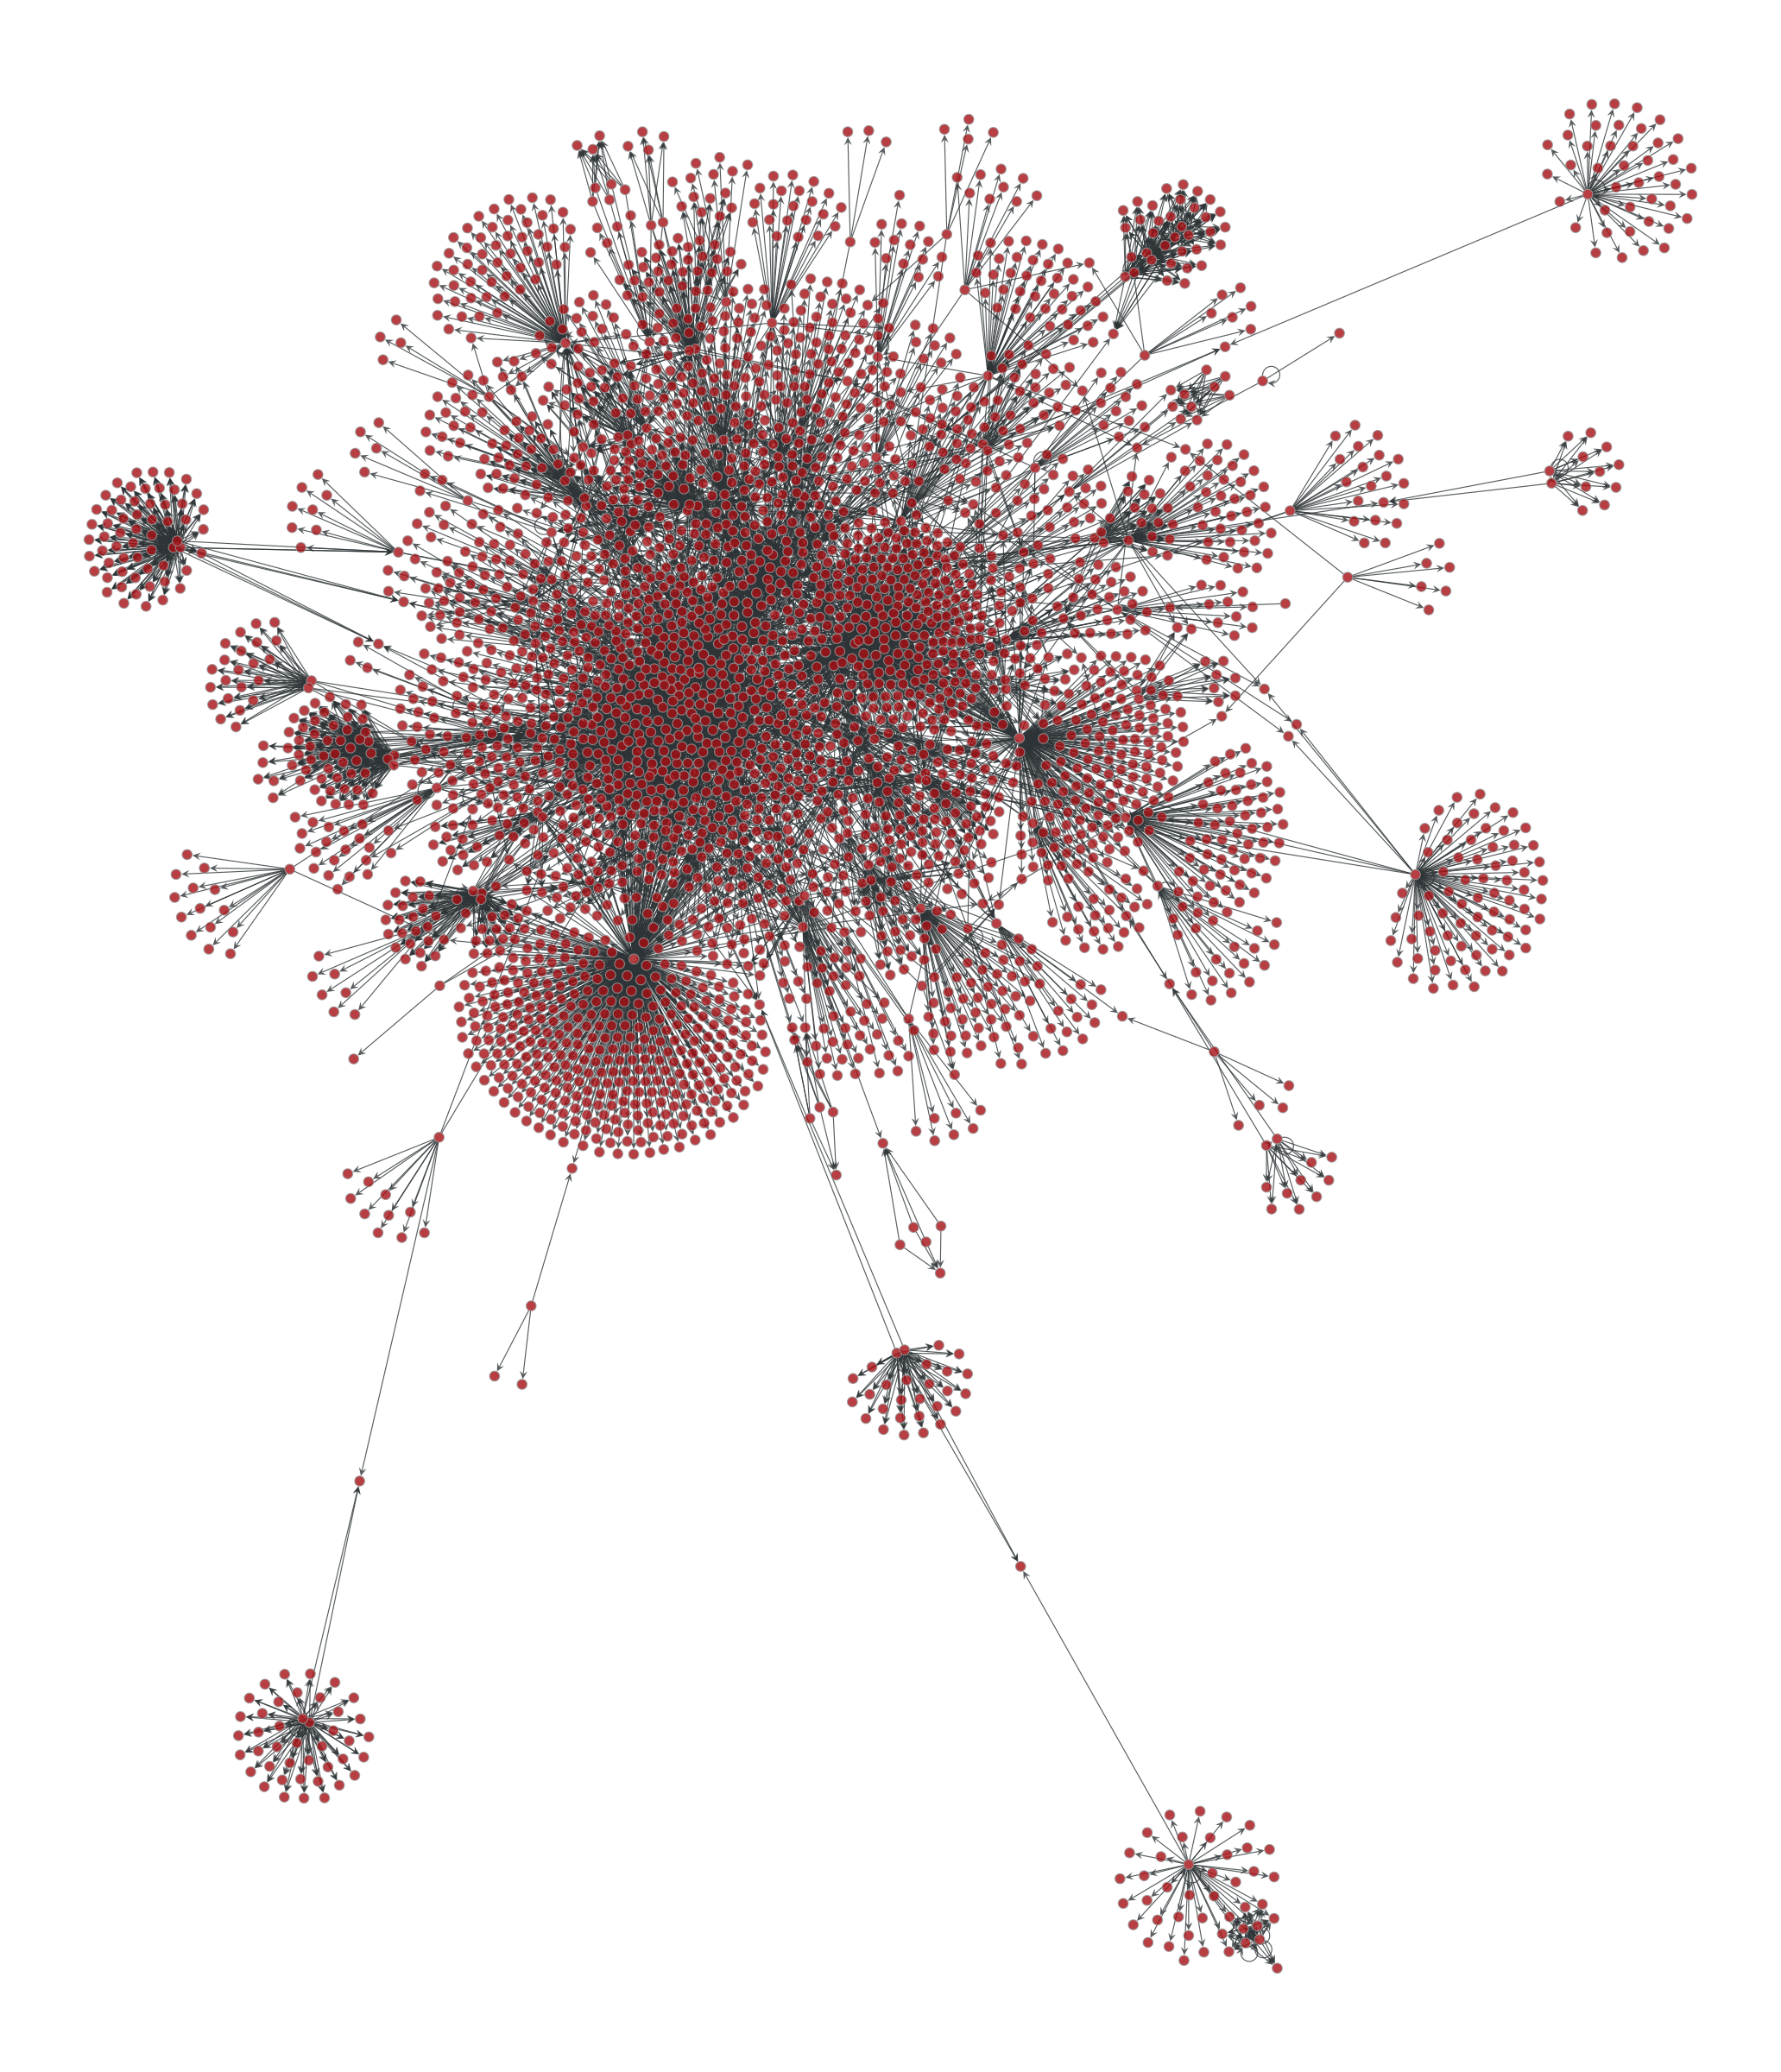

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2cbd4ab10, at 0x2cc6cfb90>

In [14]:
from graph_tool.all import *
import matplotlib
import numpy as np

#g = extract_largest_component(g, directed=False)
pos = sfdp_layout(g)


dprms = dict(fmt="png",  output_size=(1200, 1200))

graph_draw(g, pos, **dprms)
        #    , vertex_fill_color=g.vp.value, vcmap=matplotlib.cm.coolwarm,
        #    vcnorm=matplotlib.colors.Normalize(vmin=0, vmax=1), **dprms)

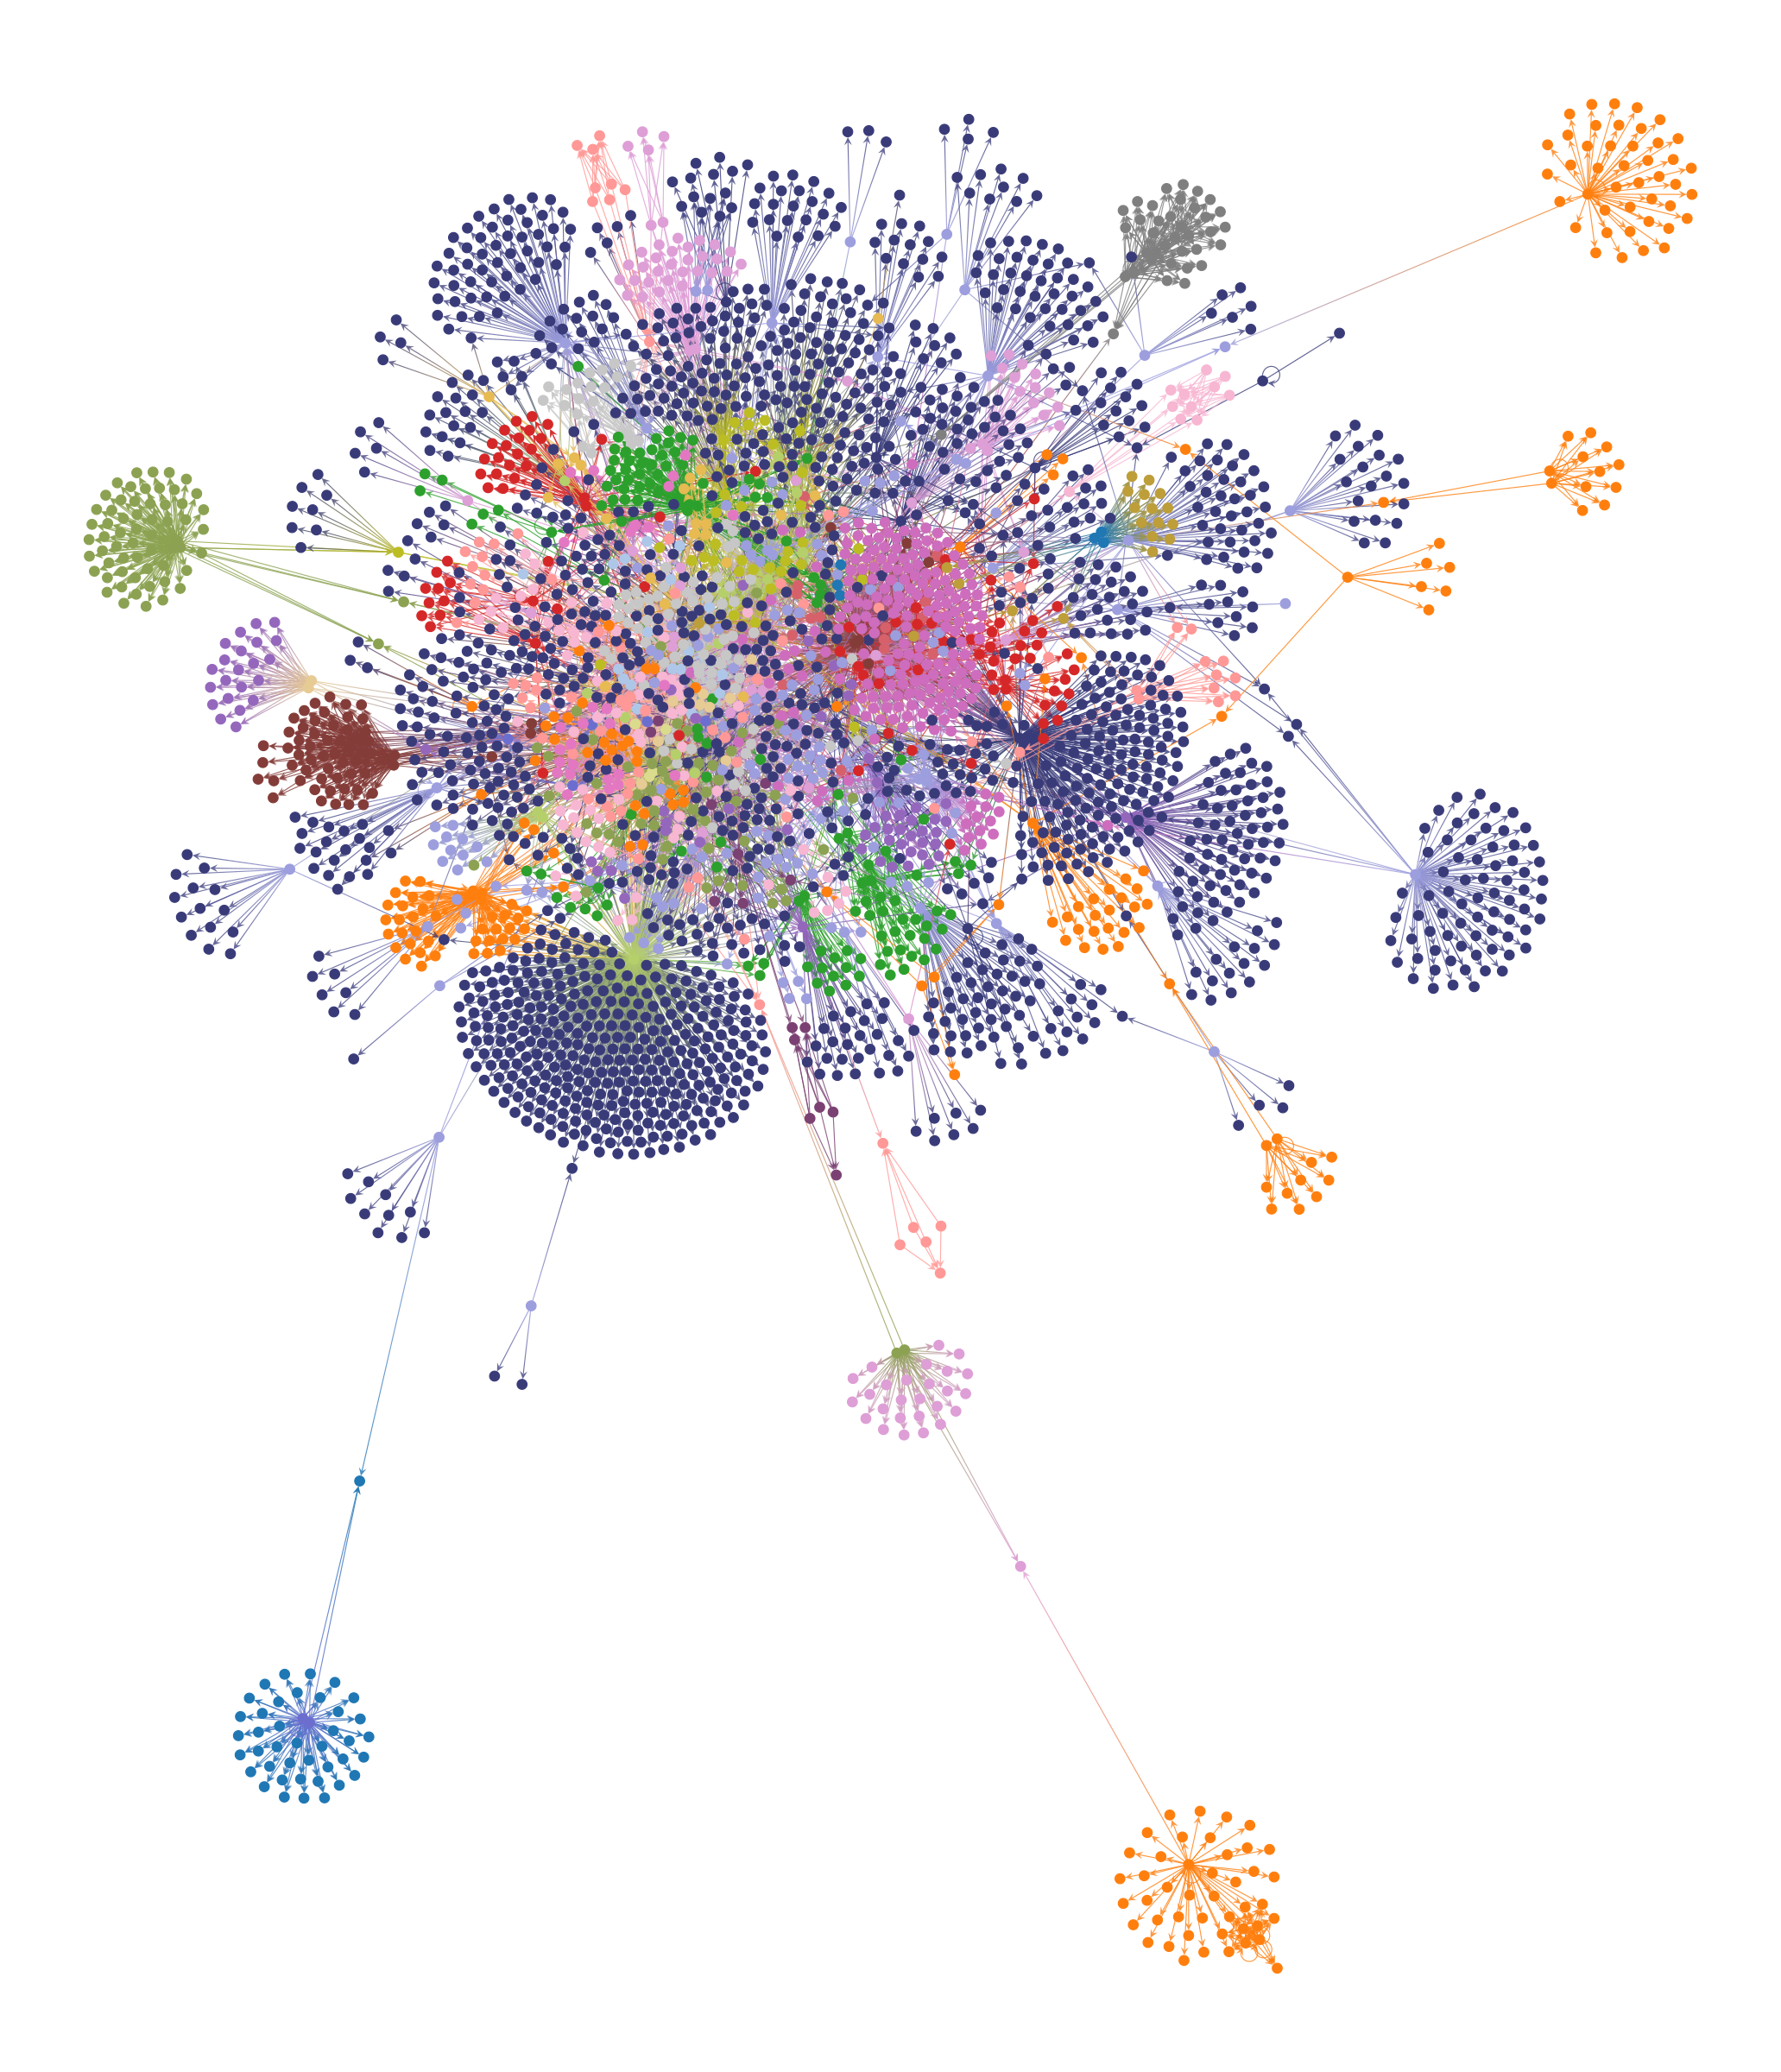

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2cbd4ab10, at 0x2db1809e0>

In [15]:
state = minimize_nested_blockmodel_dl(g)
state.levels[0].draw(pos=pos, **dprms)

In [16]:
pos2 = sfdp_layout(g, groups=state.levels[0].b, gamma=.04) 


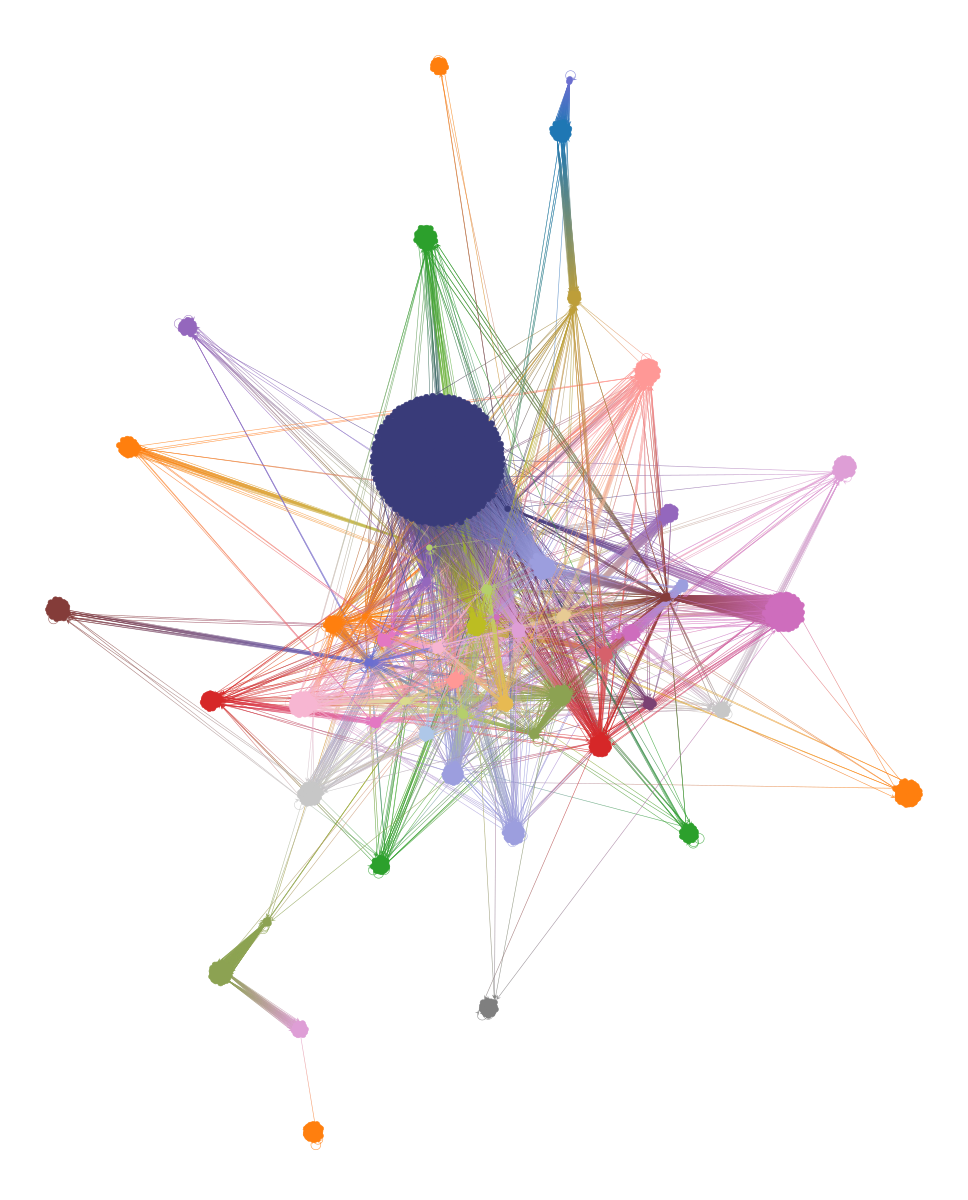

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2cbd4ab10, at 0x2e49897f0>

In [17]:
state.levels[0].draw(pos=pos2)#, edge_gradient=[], edge_color="#33333322", **dprms)

In [18]:
#!pip install umap-learn
#!pip install sentence-transformers

In [19]:
texts_to_embedd = [
    ' '.join([y.title() if y else '' for y in G.nodes(data=True)[x].get('titles', [])])
    for x in G.nodes()
]

In [ ]:
# from sentence_transformers import SentenceTransformer

# model = SentenceTransformer("all-mpnet-base-v2")#allenai-specter


# embeddings = model.encode(['texts_to_embedd']*20, show_progress_bar=True, batch_size=10)

/Users/Noich001/miniforge3/envs/network_epist_playground/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


: 

In [ ]:
#

import matplotlib.pyplot as plt
import umap



# Extract adjacency matrix
adj_matrix = nx.to_numpy_array(G_more_than_one_link)

# Apply UMAP
reducer = umap.UMAP(n_neighbors=5, min_dist=0.01, metric='cosine')
embedding = reducer.fit_transform(adj_matrix,state.levels[0].get_blocks())

In [ ]:
adj_matrix

array([[3., 1., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
embedding

array([[ 3.8930893 , -1.1891959 ],
       [-5.11648   ,  4.2659907 ],
       [ 7.464322  ,  6.192693  ],
       ...,
       [ 6.1128764 , -0.87426746],
       [ 0.5698822 , -2.4158702 ],
       [ 0.10195082,  9.178891  ]], dtype=float32)

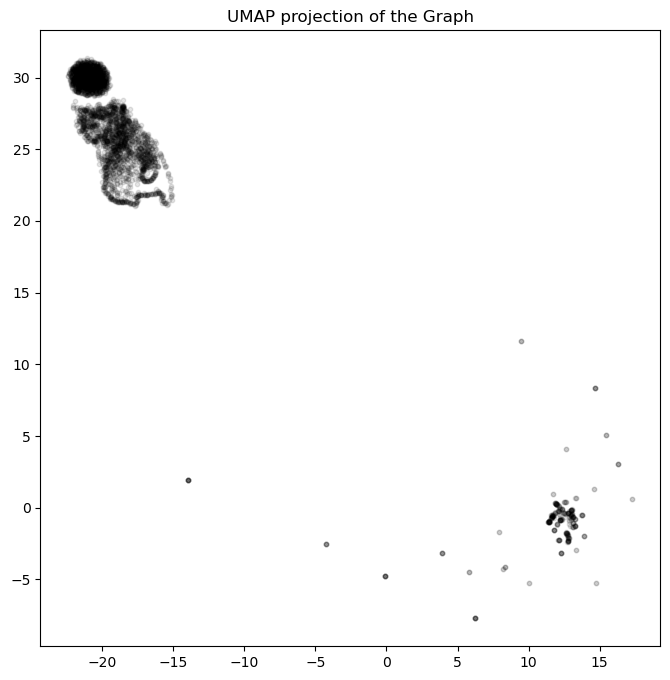

In [94]:
# Plotting
plt.figure(figsize=(8, 8))
# Draw edges
# for edge in G.edges():
#     points = embedding[list(edge)]
#     plt.plot(points[:, 0], points[:, 1], 'grey', alpha=0.5)

# Draw nodes
plt.scatter(embedding[:, 0], embedding[:, 1], c='black', s=10,alpha=.1)

plt.title('UMAP projection of the Graph')
plt.show()